# Experiments on EMG analysis
This notebook allows a researcher to collect data on a set of EMG. The data are collected for each breath and include total area under breath curve, maximum value in each breath, legnth of breaths, and relative location of maximum value(as both raw and percentage of total breath).

## Import libraries

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import collections
from collections import namedtuple
import builtins
import math

from resurfemg.config import Config
from resurfemg.tmsisdk_lite import Poly5Reader

In [2]:

sys.path.insert(0, '../resurfemg')
import helper_functions as hf

# Set a collection place for experiments

In [3]:
# do not rerun this cell
big_data_list = []

Below change the path to the root directory where you are keeping your EMGs and ventilator "Draeger" files

# Reruns should be done from this cell as the start

In [4]:
config = Config()
root_emg_directory = config.get_directory('root_emg_directory')

In [5]:
emg_pattern = os.path.join(root_emg_directory, '**/*.Poly5')
emg_and_draeger_files = glob.glob(emg_pattern, recursive=True)

emg_files = []
draeger_files = []

for file in emg_and_draeger_files:
    if 'Draeger' in file:
        draeger_files.append(file)
    else:
        emg_files.append(file)

Now you can pick a file from the list, which have been numbered.

In [6]:
list_of_numbers_strung = []
for i in range(len(emg_files)):
    list_of_numbers_strung.append(str(i))


btn = widgets.Dropdown(
    options=list_of_numbers_strung,
    value='0',
    description='Picked File:',
    disabled=False,
)
display(btn)

Dropdown(description='Picked File:', options=('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '1…

# Caution! 
If you folder is set up in any way different then the picked file numbers will not neccesarily correspond to the same file. Always check the print out for the file you have chosen in the cell below

In [7]:
number_chosen = int(btn.value)
file_chosen = emg_files[number_chosen] 
print("The file you chose is:",file_chosen)

The file you chose is: C:/Projects/ReSurfEMG/not_pushed/topspin_data_anonymized\M001\001\EMG_recording.Poly5


In [8]:
data_emg = Poly5Reader(file_chosen)
data_samples= data_emg.samples
emg_sample_rate = data_emg.sample_rate
converted_to_seconds =  []
converted_to_samples = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_sample_rate)
    converted_to_samples.append(i)

Reading file  C:/Projects/ReSurfEMG/not_pushed/topspin_data_anonymized\M001\001\EMG_recording.Poly5
	 Number of samples:  172576 
	 Number of channels:  3 
	 Sample rate: 2048 Hz
Done reading data.


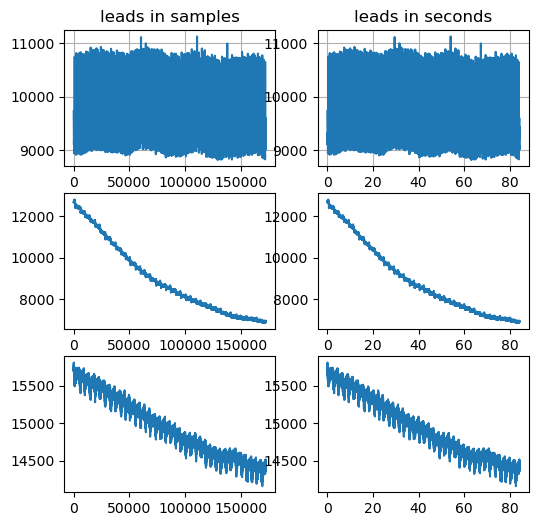

In [9]:
%matplotlib inline
# set up plotn
x = data_samples
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(6, 6))
axis[0,0].grid(True)
axis[0,0].plot(x[0])
axis[0,0].set(title='leads in samples')
axis[1,0].plot(x[1])
axis[2,0].plot(x[2])
axis[0,1].set(title='leads in seconds')
axis[0,1].grid(True)
axis[0,1].plot(converted_to_seconds,x[0])
axis[1,1].plot(converted_to_seconds,x[1])
axis[2,1].plot(converted_to_seconds,x[2])

That is the whole unfiltered EMG, but you probably want to examine a part. You will also want to examine something filtered down to only the EMG components. Therefore we will filter off only the EMG components with an ICA in addtion to the filter we will play with.

Now you can filter down to which part you want to see. 

Do you want to cut and see the file in samples or seconds?

In [10]:
y_axis = widgets.Dropdown(
    options=["Samples","Seconds"],
    value='Samples',
    description="Select View Option",
    disabled=False,
)
display(y_axis)


Dropdown(description='Select View Option', options=('Samples', 'Seconds'), value='Samples')

In [11]:
time_view= y_axis.value
time_view

'Samples'

Now you will pick the start and end of your sample.We are going to clip the end of the sample in processing, so you can not pick any values and get a good graph. We preset the values towards the max graphable with ease, but they can be overwritten.  In the future we will have an updating graph here. 

In [12]:
if time_view == 'Samples':
    int_slider1 = widgets.IntSlider(
        min=0, max=int(len(x[0])*0.89), step=1,
        description=' samples start'
    )
    int_slider2 = widgets.IntSlider(
        value=len(x[0]),
        min=0, max=int(len(x[0])*0.89), step=1,
        description='samples end cutoff'
    )
else:
    int_slider1 = widgets.IntSlider(
        #value=0.1,
        min=0, max= int(converted_to_seconds[-1])*0.89, step=1,
        description='seconds start'
    )
    int_slider2 = widgets.IntSlider(
        #value=converted_to_seconds[-1],
        min=0, max=int(converted_to_seconds[-1])*0.89, step= 1,
        description='seconds end cutoff'
    )
    
widgets.VBox(
    [

        int_slider1,
        int_slider2,

    ]
)



You can overwrite the values by hand in the next cell, if scrolling is not precise enough...but rewriting to take an absolute end is unadvisable.

In [31]:
# # # Here we can overwrite the values by hand, again you must pick values a bit inside
int_slider1.value = 0
int_slider2.value = 50000

For now we will graph your choice in the next active cell

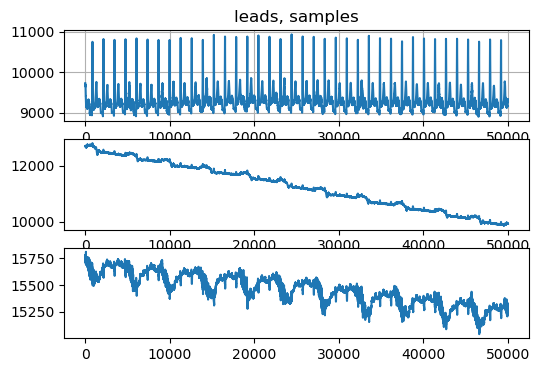

In [32]:
start = int_slider1.value
end= int_slider2.value
if time_view == 'Samples':
    # nox examine at a certain scale- from point a to b as samples
    x = data_samples
    fig, (ax_1,ax_2,ax_3) = plt.subplots(nrows = 3, figsize=(6, 4))
    ax_1.grid(True)
    ax_1.plot(x[0][int(start):int(end)])
    ax_1.set(title='leads, samples')
    ax_2.plot(x[1][int(start):int(end)])
    ax_3.plot(x[2][int(start):int(end)])
    
if time_view == 'Seconds':
    # nox examine at a certain scale- from point a to b as samples
    x_for_secs = data_samples

    y = converted_to_seconds
    fig, (ax_1,ax_2,ax_3) = plt.subplots(nrows = 3, figsize=(6, 4))
    ax_1.grid(True)
    ax_1.plot(y[int(start*emg_sample_rate):int(end*emg_sample_rate)],x[0][int(start*emg_sample_rate):int(end*emg_sample_rate)])
    ax_1.set(title='leads, seconds')
    ax_2.plot(y[int(start*emg_sample_rate):int(end*emg_sample_rate)],x[1][int(start*emg_sample_rate):int(end*emg_sample_rate)])
    ax_3.plot(y[int(start*emg_sample_rate):int(end*emg_sample_rate)],x[2][int(start*emg_sample_rate):int(end*emg_sample_rate)])
    

Happy with your selection? If not redo the widgeted cell, then we can see how the filter the selection in a basic pipleline before extracting entropy.

In [33]:
def minimal_ecg_pipeline(our_chosen_file, heart_lead_number, frequency):
    """
    Here we have a minimal basic pre-processing pipeline. Note 
    heart leads should be counted in Python numbering
    i.e. lead number one is zero. 
    """
# step 1 cut off any wierd end
    cut_file_data = hf.bad_end_cutter_for_samples(
        our_chosen_file, percent_to_cut=3, tolerance_percent=5)
    # step 2 minimal filtering    
    bd_filtered_file_data = hf.emg_bandpass_butter_sample(
        cut_file_data, 1, frequency/2.1, frequency, output='sos')
    # step 3 end-cutting again to get rid of filtering artifacts
    re_cut_file_data = hf.bad_end_cutter_for_samples(
        bd_filtered_file_data, percent_to_cut=3, tolerance_percent=5)
    return re_cut_file_data

In [16]:
processed_data_emg2 = minimal_ecg_pipeline(data_samples,0, 2048)[2]


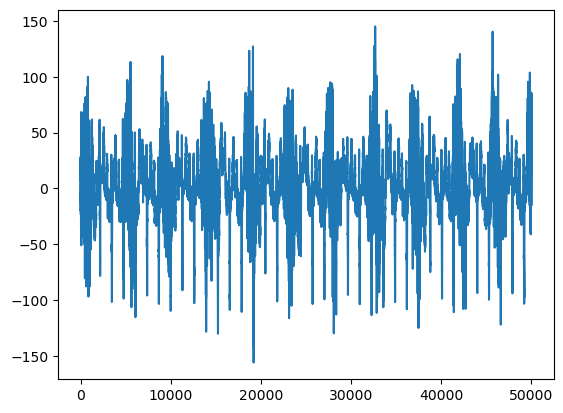

In [17]:
plt.plot(processed_data_emg2[0:50000])

In [18]:
# dropdown to pick ICA possibilities. CUrrently only one -\o/-
ICA_choice = widgets.Dropdown(
    options=["classic","no_ica_lead3"],
    value='classic',
    description="Select View Option",
    disabled=False,
)
display(ICA_choice)

Dropdown(description='Select View Option', options=('classic', 'no_ica_lead3'), value='classic')

Here we will have to rewrite to accomodate different ICAs, but this is in the future. After we iron out the alternative ICAs. Below we put our EMG data through the pipeline we have now, and we must do picking from an ICA by more peaks or by dis-similarity to the heart/ECG lead.

In [19]:
ICA_picker_choice = widgets.Dropdown(
    options=["more_peaks","similar_to_ECG"],
    value='more_peaks',
    description="Select View Option",
    disabled=False,
)
display(ICA_picker_choice)

Dropdown(description='Select View Option', options=('more_peaks', 'similar_to_ECG'), value='more_peaks')

In [20]:
ICA_picker_choice.value

'more_peaks'

# Let's examine our processed EMG on more normal processing standards

C:\Users\makeda\anaconda3\envs\you_workshop\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


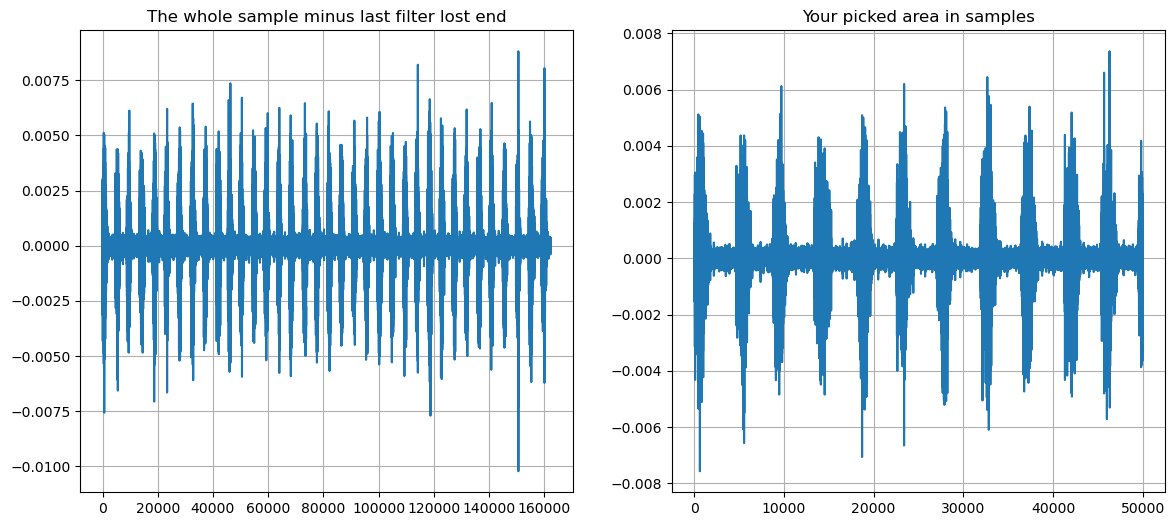

In [34]:
if ICA_picker_choice.value == 'more_peaks':
    processed_data_emg = hf.working_pipeline_pre_ml(data_samples,picker='peaks')
elif ICA_picker_choice.value == 'similar_to_ECG':
    processed_data_emg = hf.working_pipeline_pre_ml(data_samples,picker='heart')
else:
    processed_data_emg = hf.working_pipeline_pre_ml(data_samples,picker='heart')

if time_view == 'Seconds':
    %matplotlib inline
    # set up plotn
    x = processed_data_emg
    fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize=(14, 6))
    axis[0].grid(True)
    axis[0].plot(converted_to_seconds[:len(x)], x)
    axis[0].set(title='The whole sample minus last filter lost end')
    axis[1].set(title='Your picked area in seconds')
    axis[1].grid(True)
    axis[1].plot(converted_to_seconds[int(start*emg_sample_rate):int(end*emg_sample_rate)],x[int(start*emg_sample_rate):int(end*emg_sample_rate)])
else:
    %matplotlib inline
    x = processed_data_emg
    fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize=(14, 6))
    axis[0].grid(True)
    axis[0].plot(x)
    axis[0].set(title='The whole sample minus last filter lost end')
    axis[1].set(title='Your picked area in samples')
    axis[1].grid(True)
    axis[1].plot(converted_to_samples[int(start):int(end)],x[int(start):int(end)])
    

In [35]:
# in case we want to look in seconds later
start_s= start * emg_sample_rate
end_s = end * emg_sample_rate


In [36]:
# reminder
time_view

'Samples'

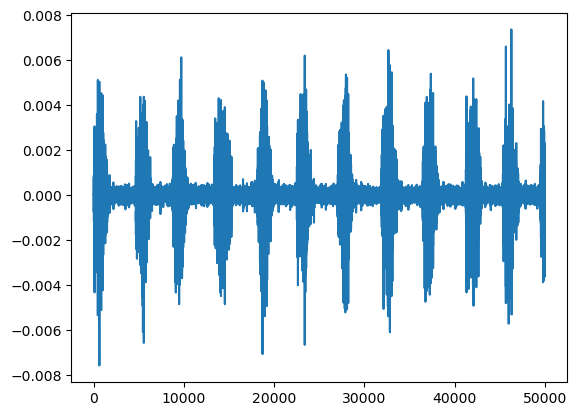

In [37]:
plt.plot(processed_data_emg[0:50000])

# Our minimal processing standards

162376

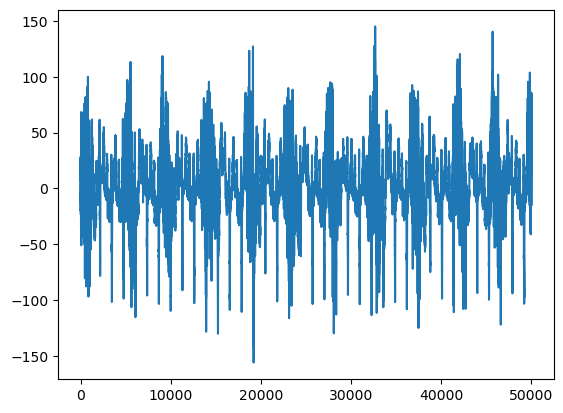

In [38]:
plt.plot(processed_data_emg2[0:50000])
len(processed_data_emg2)

Variability on ECG - EMG

In [26]:
#np.max(rms_rolled2)*0.05

Our variability function scratchpad (should eventually match the one in helper functions but here for experimentation)

In [ ]:
def var_array_maker(array, segment_size, method='variance'):
    """
    Calculate variability of segments of an array according to a specific method,
    then interpolate the values back to the original legnth of array
        
    
    :param array: the input array
    :type array: ~numpy.ndarray

    :param segment_size: legnth over which variabilty calculated
    :type segment_size: int
    
    :param method: method for variability caulculation
    :type method: str

    :returns: variability_values (numpy array): array showing variability over segments
    :rtype: ~numpy.ndarray    
        
    """
    variability_values = []
    if method=='variance':
        for i in range(1, len(array) - segment_size):
            var_emg = np.var(array[i:i + segment_size])
            variability_values.append(var_emg)
    
        values_out = np.array(variability_values) 
     
    elif method == 'std':
        
    # Calculate the standard deviation of each segment
#         segments = [array[i:i+segment_size] for i in range(0, len(array), segment_size)]
#         for segment in segments:
#             variability_value = np.std(segment)
#             variability_values.append(variability_value)
#         values_out = np.array(variability_values)
        variability_values= [
            np.std(array[i:i+segment_size]) for i in range(0, len(array), segment_size)
        ]
        values_out = np.array(variability_values)
        
    else: 
        print("You did not choose an exisitng method")
        
    variability_array =  scipy.signal.resample(values_out,len(array))
    return variability_array

In [ ]:
alt_vars_emg2 = var_array_maker(processed_data_emg2, 10)
alt_vars_emg2

In [ ]:
vars_emg2 = var_array_maker(processed_data_emg2, 10)
    
alt_vars_emg2 = var_array_maker(processed_data_emg2, 10)

rms_rolled2 = hf.vect_naive_rolling_rms(vars_emg2,100) 
cut_line = []
for num in rms_rolled2:
    if num > np.max(rms_rolled2)*0.05:
        num = 1000
    else:
        num = 0
    cut_line.append(num)
cut_line = np.array(cut_line)
cut_line2 = []   
samples_sustained = 150
index = 0

for num in cut_line:
    
    
   # if  most of the nextt so many are also 1000:
        
    sequence = cut_line[index:(index+samples_sustained)]
    index +=1
        #print(sequence)
    if np.sum(sequence) > 0.75 * (1000 *len(sequence)):
        num = 1000
    else:
        num = 0
    cut_line2.append(num)
#plt.plot(processed_data_emg[0:10000]*400000, color= 'blue', alpha = 0.5)
plt.plot(vars_emg2[0:10000]*10000, color = 'orange', alpha = 0.5)
plt.plot(alt_vars_emg2[0:10000]*500, color = 'blue', alpha = 0.5)
#plt.plot(rms_rolled2[0:10000], color ='green', alpha = 0.5)
#plt.plot(cut_line[0:10000], color ='green', alpha = 0.5)
#plt.plot(cut_line2[0:10000], color ='purple', alpha = 0.5)
#print(cut_line2)


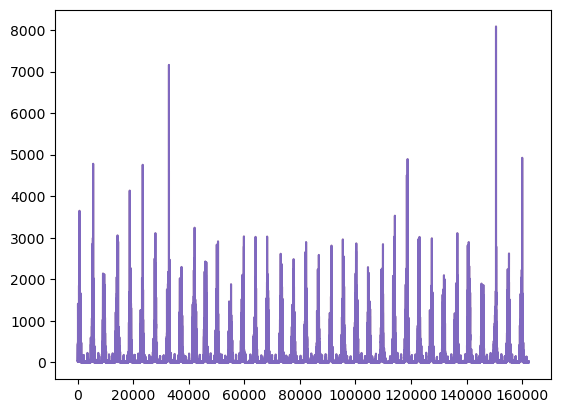

In [27]:
hf_vars_emg2 = hf.variability_maker(processed_data_emg2, 10, fill_method= 'avg')
    
hf_alt_vars_emg2 = hf.variability_maker(processed_data_emg2, 10, fill_method= 'zeros')

rms_rolled2 = hf.vect_naive_rolling_rms(hf_vars_emg2,100) 
cut_line = []
for num in rms_rolled2:
    if num > np.max(rms_rolled2)*0.05:
        num = 1000
    else:
        num = 0
    cut_line.append(num)
cut_line = np.array(cut_line)
cut_line2 = []   
samples_sustained = 150
index = 0

for num in cut_line:
    
    
   # if  most of the nextt so many are also 1000:
        
    sequence = cut_line[index:(index+samples_sustained)]
    index +=1
        #print(sequence)
    if np.sum(sequence) > 0.75 * (1000 *len(sequence)):
        num = 1000
    else:
        num = 0
    cut_line2.append(num)
#plt.plot(processed_data_emg[0:10000]*400000, color= 'blue', alpha = 0.5)
plt.plot(hf_vars_emg2, color = 'orange', alpha = 0.5)
plt.plot(hf_alt_vars_emg2, color = 'blue', alpha = 0.5)
#plt.plot(rms_rolled2[0:10000], color ='green', alpha = 0.5)
#plt.plot(cut_line[0:10000], color ='green', alpha = 0.5)
#plt.plot(cut_line2[0:10000], color ='purple', alpha = 0.5)
#print(cut_line2)


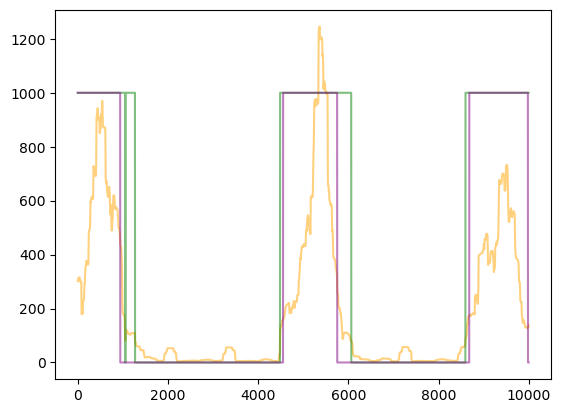

In [28]:
# vars_emg2 = variability_maker(processed_data_emg2, 10, 'std')
    
# alt_vars_emg2 = variability_maker(processed_data_emg2, 10, 'variance')

#rms_rolled2 = hf.vect_naive_rolling_rms(hf_vars_emg2,100) 
rms_rolled3 = hf.vect_naive_rolling_rms(hf_vars_emg2,205) 
cut_line = []
for num in rms_rolled3:
    if num > np.max(rms_rolled3)*0.05:
        num = 1000
    else:
        num = 0
    cut_line.append(num)
cut_line = np.array(cut_line)
cut_line_running = []   
samples_sustained = 150
index = 0

for num in cut_line:
    
    
   # if  most of the nextt so many are also 1000:
        
    sequence = cut_line[index:(index+samples_sustained)]
    index +=1
        #print(sequence)
    if np.sum(sequence) > 0.75 * (1000 *len(sequence)):
        num = 1000
    else:
        num = 0
    cut_line_running.append(num)
#plt.plot(processed_data_emg[0:10000]*400000, color= 'blue', alpha = 0.5)
#plt.plot(vars_emg2[0:10000]*10000, color = 'orange', alpha = 0.5)
#plt.plot(alt_vars_emg2[0:10000]*500, color = 'blue', alpha = 0.5)
#plt.plot(rms_rolled2[0:2000], color ='blue', alpha = 0.5)
plt.plot(rms_rolled3[0:10000], color ='orange', alpha = 0.5)
plt.plot(cut_line[0:10000], color ='green', alpha = 0.5)
plt.plot(cut_line2[0:10000], color ='purple', alpha = 0.5)
#print(cut_line2)


that worked out backwards...

so it looks like we can probably use a two cut-line approach with some caveats, you need to have a big enough window on your rms rolling, and you need to somehow take care of any shifts that causes. Let' model a 40% then 3% approach

Step one is to look at the cutoffs without the merge

In [80]:
if time_view == 'Samples':
    big_list = hf_vars_emg2[int(start):int(end)]

In [81]:
#big_list = big_list[:8000]

In [103]:
# slice_length = 205
# def sliceIterator(lst, sliceLen):
#     for i in range(len(lst) - sliceLen + 1):
#         yield lst[i:i + sliceLen]
# index_hold = []
# for slice in sliceIterator(big_list, slice_length):
#     variability_index = hf.variability_maker(slice,10)
#     index_hold.append(variability_index)
# index_hold = []

#     variability_index = hf.variability_maker(slice,10)
#     index_hold.append(variability_index)
rms_rolled = hf.vect_naive_rolling_rms(big_list,205) 

high_decision_cutoff = 0.40  * ((np.max(rms_rolled)) - (np.min(rms_rolled))) + np.min(rms_rolled)
decision_cutoff =      0.03 * ((np.max(rms_rolled)) - (np.min(rms_rolled))) + np.min(rms_rolled)
                          


In [104]:
np.max(rms_rolled)

1332.3039756875758

In [105]:
print(len(big_list))

50000


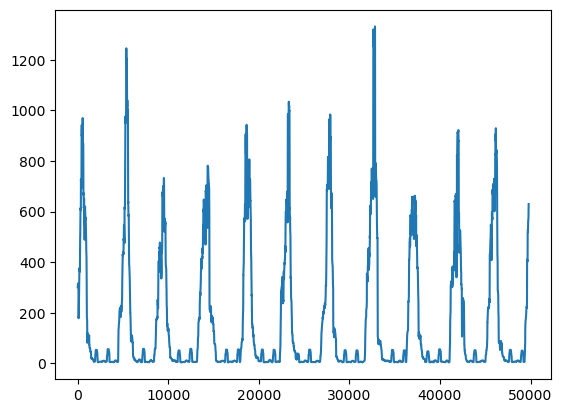

In [106]:
plt.plot(rms_rolled)

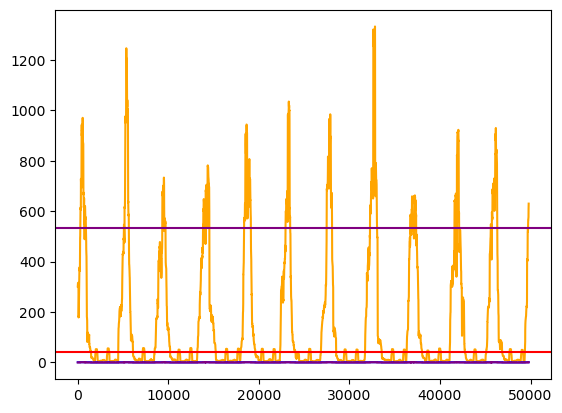

In [107]:
if time_view == 'Samples':
    #plt.plot(big_list[int(start):(int(start) + len(rms_rolled))]*1000, alpha = 0.5)
    plt.plot(rms_rolled, color='orange')
    plt.plot(hf.zero_one_for_jumps_base(rms_rolled,decision_cutoff), color='blue')
    plt.plot(hf.zero_one_for_jumps_base(rms_rolled,high_decision_cutoff), color= 'purple')
    plt.axhline(y = decision_cutoff, color = 'r', linestyle = '-')
    plt.axhline(y = high_decision_cutoff, color = 'purple', linestyle = '-')

In [108]:

hi = np.array(hf.zero_one_for_jumps_base(rms_rolled, high_decision_cutoff))
lo = np.array(hf.zero_one_for_jumps_base(rms_rolled, decision_cutoff))

rhi = hf.ranges_of(hi)
rlo = hf.ranges_of(lo)

keep = hf.intersections(rlo, rhi)


points = np.array(sum(keep, start=()), dtype=np.int32)
points

array([    0,  1459,  4481,  6095,  8490, 10198, 13200, 15242, 17994,
       19598, 22353, 24015, 26846, 28526, 31724, 33553, 36314, 38026,
       41075, 42739, 45101, 46868, 49377, 49794])

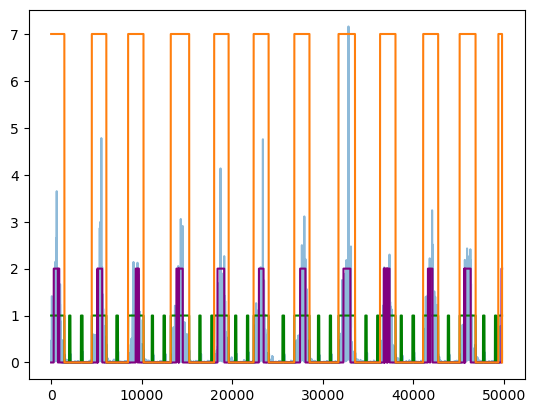

In [109]:


seven_line = np.zeros(len(rms_rolled))
for seven_range in keep:
    seven_line[seven_range.to_slice()] = 7
if time_view == 'Samples':
    plt.plot(hf_vars_emg2[int(start):(int(start) + len(rms_rolled))] /1000, alpha = 0.5)
    plt.plot(hf.zero_one_for_jumps_base(rms_rolled,decision_cutoff),  color = 'green')
    plt.plot((np.array(hf.zero_one_for_jumps_base(rms_rolled,high_decision_cutoff)))*2, color= 'purple')
    plt.plot(seven_line)
# else:
#     plt.plot(converted_to_seconds[int(start_s):(int(start_s) + len(rms_rolled))],processed_data_emg[int(start_s):(int(start_s) + len(rms_rolled))]*1000, alpha = 0.5)
#     plt.plot(converted_to_seconds[int(start_s):(int(start_s) + len(rms_rolled))],hf.zero_one_for_jumps_base(rms_rolled,decision_cutoff),  color = 'green')
#     plt.plot(converted_to_seconds[int(start_s):(int(start_s) + len(rms_rolled))],(np.array(hf.zero_one_for_jumps_base(rms_rolled,high_decision_cutoff)))*2, color= 'purple')
#     plt.plot(converted_to_seconds[int(start_s):(int(start_s) + len(rms_rolled))], seven_line)
    



function for failed approach

In [ ]:
def find_breaths_vari_sustained(array, percent_max_vari, samples_sustained):
    vars_emg2=[]
    for i in range(1, len(processed_data_emg2)-10):
        var_emg = np.var(processed_data_emg2[i:i + 10])
        vars_emg2.append(var_emg)
    rms_rolled2 = hf.vect_naive_rolling_rms(vars_emg2,100) 
    cut_line = []
    for num in rms_rolled2:
        if num > np.max(rms_rolled2)*(percent_max_vari/100):
            num = 1000
        else:
            num = 0
        cut_line.append(num)
    cut_line2 = []
    for num in cut_line:
    #if most (75%) of the next so many (samples sustained) are also 1000:
        sequence = cut_line[index:(index+samples_sustained)]
        index +=1
        #print(sequence)
        if np.sum(sequence) > 0.75 * (1000 *len(sequence)):
            num = 1000
        else:
            num = 0
        cut_line2.append(num)
    return cut_line2
    

In [ ]:
found = find_breaths_vari_sustained(processed_data_emg2, 5, 150)
plt.plot(found)

## Variability on other EMG signals

To be explored
